In [92]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime 
import calendar
import seaborn as sns
sns.set()

In [3]:
sv = pd.read_csv('US_Accidents_Dec19.csv')

In [4]:
sv.head()

,ID,Source,TMC,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,MapQuest,201.0,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,MapQuest,201.0,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,...,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,MapQuest,201.0,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,...,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,MapQuest,201.0,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,...,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,MapQuest,201.0,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,...,False,False,False,False,True,False,Day,Day,Day,Day


In [5]:
sv.astype('category')

,ID,Source,TMC,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,MapQuest,201.0,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,MapQuest,201.0,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,...,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,MapQuest,201.0,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,...,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,MapQuest,201.0,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,...,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,MapQuest,201.0,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,...,False,False,False,False,True,False,Day,Day,Day,Day
5,A-6,MapQuest,201.0,3,2016-02-08 07:44:26,2016-02-08 08:14:26,40.100590,-82.925194,NaN,NaN,...,False,False,False,False,False,False,Day,Day,Day,Day
6,A-7,MapQuest,201.0,2,2016-02-08 07:59:35,2016-02-08 08:29:35,39.758274,-84.230507,NaN,NaN,...,False,False,False,False,False,False,Day,Day,Day,Day
7,A-8,MapQuest,201.0,3,2016-02-08 07:59:58,2016-02-08 08:29:58,39.770382,-84.194901,NaN,NaN,...,False,False,False,False,False,False,Day,Day,Day,Day
8,A-9,MapQuest,201.0,2,2016-02-08 08:00:40,2016-02-08 08:30:40,39.778061,-84.172005,NaN,NaN,...,False,False,False,False,False,False,Day,Day,Day,Day
9,A-10,MapQuest,201.0,3,2016-02-08 08:10:04,2016-02-08 08:40:04,40.100590,-82.925194,NaN,NaN,...,False,False,False,False,False,False,Day,Day,Day,Day


In [6]:
sv.isnull().sum()

ID                             0
Source                         0
TMC                       728071
Severity                       0
Start_Time                     0
End_Time                       0
Start_Lat                      0
Start_Lng                      0
End_Lat                  2246264
End_Lng                  2246264
Distance(mi)                   0
Description                    1
Number                   1917605
Street                         0
Side                           0
City                          83
County                         0
State                          0
Zipcode                      880
Country                        0
Timezone                    3163
Airport_Code                5691
Weather_Timestamp          36705
Temperature(F)             56063
Wind_Chill(F)            1852623
Humidity(%)                59173
Pressure(in)               48142
Visibility(mi)             65691
Wind_Direction             45101
Wind_Speed(mph)           440840
Precipitat

In [23]:
sv_main=sv.drop(columns=['ID','Source','End_Lat','TMC','End_Lng','Number','Wind_Chill(F)','Zipcode','Country','Timezone','Airport_Code','Wind_Direction','Weather_Timestamp','Temperature(F)','Humidity(%)','Pressure(in)','Precipitation(in)'])

In [27]:
sv_main['City']=sv_main['City'].fillna("Unknown")
sv_main['Sunrise_Sunset']=sv_main['Sunrise_Sunset'].fillna("Unknown")
sv_main['Civil_Twilight']=sv_main['Civil_Twilight'].fillna("Unknown")
sv_main['Nautical_Twilight']=sv_main['Nautical_Twilight'].fillna("Unknown")
sv_main['Astronomical_Twilight']=sv_main['Astronomical_Twilight'].fillna("Unknown")
sv_main['Weather_Condition']=sv_main['Weather_Condition'].fillna("Unknown")
sv_main['Visibility(mi)'].fillna(sv_main['Visibility(mi)'].median(), inplace=True)
sv_main['Wind_Speed(mph)'].fillna(sv_main['Wind_Speed(mph)'].median(), inplace=True)


sv_main=sv_main[sv_main.City != "Unknown"]
sv_main=sv_main[sv_main.Sunrise_Sunset != "Unknown"]
sv_main=sv_main[sv_main.Civil_Twilight != "Unknown"]
sv_main=sv_main[sv_main.Nautical_Twilight != "Unknown"]
sv_main=sv_main[sv_main.Astronomical_Twilight != "Unknown"]
sv_main=sv_main[sv_main.Weather_Condition != "Unknown"]

In [28]:
sv_main

,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,Distance(mi),Description,Street,Side,City,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,0.010,Right lane blocked due to accident on I-70 Eas...,I-70 E,R,Dayton,...,False,False,False,False,False,False,Night,Night,Night,Night
1,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,0.010,Accident on Brice Rd at Tussing Rd. Expect del...,Brice Rd,L,Reynoldsburg,...,False,False,False,False,False,False,Night,Night,Night,Day
2,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,0.010,Accident on OH-32 State Route 32 Westbound at ...,State Route 32,R,Williamsburg,...,False,False,False,False,True,False,Night,Night,Day,Day
3,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,0.010,Accident on I-75 Southbound at Exits 52 52B US...,I-75 S,R,Dayton,...,False,False,False,False,False,False,Night,Day,Day,Day
4,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,0.010,Accident on McEwen Rd at OH-725 Miamisburg Cen...,Miamisburg Centerville Rd,R,Dayton,...,False,False,False,False,True,False,Day,Day,Day,Day
5,3,2016-02-08 07:44:26,2016-02-08 08:14:26,40.100590,-82.925194,0.010,Accident on I-270 Outerbelt Northbound near Ex...,Westerville Rd,R,Westerville,...,False,False,False,False,False,False,Day,Day,Day,Day
6,2,2016-02-08 07:59:35,2016-02-08 08:29:35,39.758274,-84.230507,0.000,Accident on Oakridge Dr at Woodward Ave. Expec...,N Woodward Ave,R,Dayton,...,False,False,False,False,False,False,Day,Day,Day,Day
7,3,2016-02-08 07:59:58,2016-02-08 08:29:58,39.770382,-84.194901,0.010,Accident on I-75 Southbound at Exit 54B Grand ...,N Main St,R,Dayton,...,False,False,False,False,False,False,Day,Day,Day,Day
8,2,2016-02-08 08:00:40,2016-02-08 08:30:40,39.778061,-84.172005,0.000,Accident on Notre Dame Ave at Warner Ave. Expe...,Notre Dame Ave,L,Dayton,...,False,False,False,False,False,False,Day,Day,Day,Day
9,3,2016-02-08 08:10:04,2016-02-08 08:40:04,40.100590,-82.925194,0.010,Right hand shoulder blocked due to accident on...,Westerville Rd,R,Westerville,...,False,False,False,False,False,False,Day,Day,Day,Day


In [68]:
sv_main.to_csv('Severity_data_group6.csv', index=False)

In [9]:
new_sv = sv[['ID','Severity','Start_Time','Side','City','County','State','Visibility(mi)','Weather_Condition']]

In [11]:
new_sv

,ID,Severity,Start_Time,Side,City,County,State,Visibility(mi),Weather_Condition
0,A-1,3,2016-02-08 05:46:00,R,Dayton,Montgomery,OH,10.0,Light Rain
1,A-2,2,2016-02-08 06:07:59,L,Reynoldsburg,Franklin,OH,10.0,Light Rain
2,A-3,2,2016-02-08 06:49:27,R,Williamsburg,Clermont,OH,10.0,Overcast
3,A-4,3,2016-02-08 07:23:34,R,Dayton,Montgomery,OH,9.0,Mostly Cloudy
4,A-5,2,2016-02-08 07:39:07,R,Dayton,Montgomery,OH,6.0,Mostly Cloudy
5,A-6,3,2016-02-08 07:44:26,R,Westerville,Franklin,OH,7.0,Light Rain
6,A-7,2,2016-02-08 07:59:35,R,Dayton,Montgomery,OH,7.0,Overcast
7,A-8,3,2016-02-08 07:59:58,R,Dayton,Montgomery,OH,7.0,Overcast
8,A-9,2,2016-02-08 08:00:40,L,Dayton,Montgomery,OH,5.0,Mostly Cloudy
9,A-10,3,2016-02-08 08:10:04,R,Westerville,Franklin,OH,3.0,Light Rain


C:\Users\adity\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


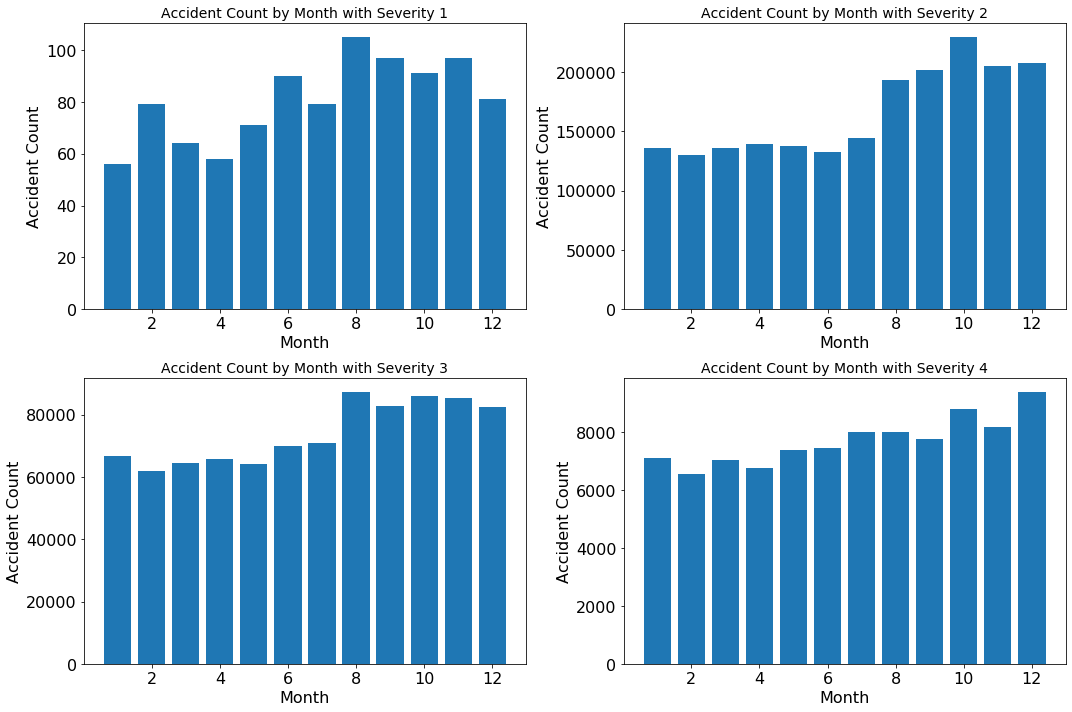

In [17]:
new_sv['time'] = pd.to_datetime(new_sv.Start_Time, format='%Y-%m-%d %H:%M:%S')

plt.subplots(2,2,figsize=(15,10))
for s in np.arange(1,5):
    plt.subplot(2,2,s)
    plt.hist(pd.DatetimeIndex(new_sv.loc[new_sv["Severity"] == s]['time']).month, bins=[1,2,3,4,5,6,7,8,9,10,11,12,13], align='left', rwidth=0.8)
    plt.title("Accident Count by Month with Severity " + str(s), fontsize=14)
    plt.xlabel("Month", fontsize=16)
    plt.ylabel("Accident Count", fontsize=16)
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
plt.tight_layout()
plt.show()

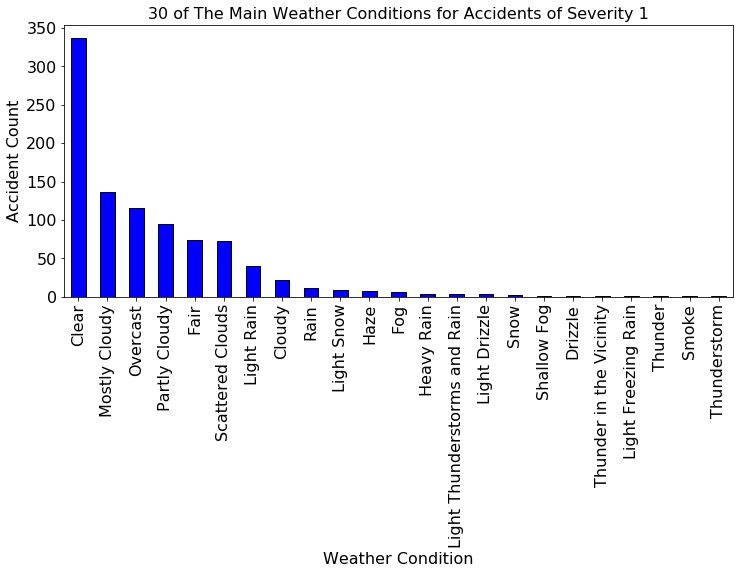

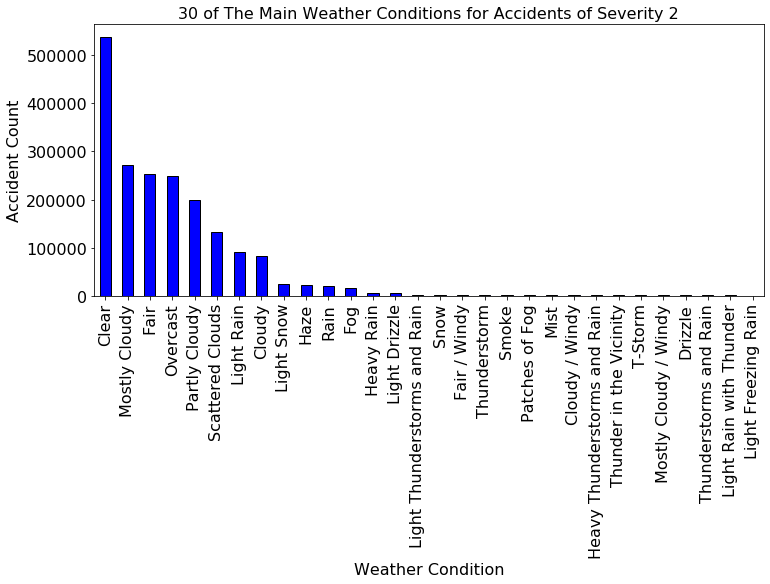

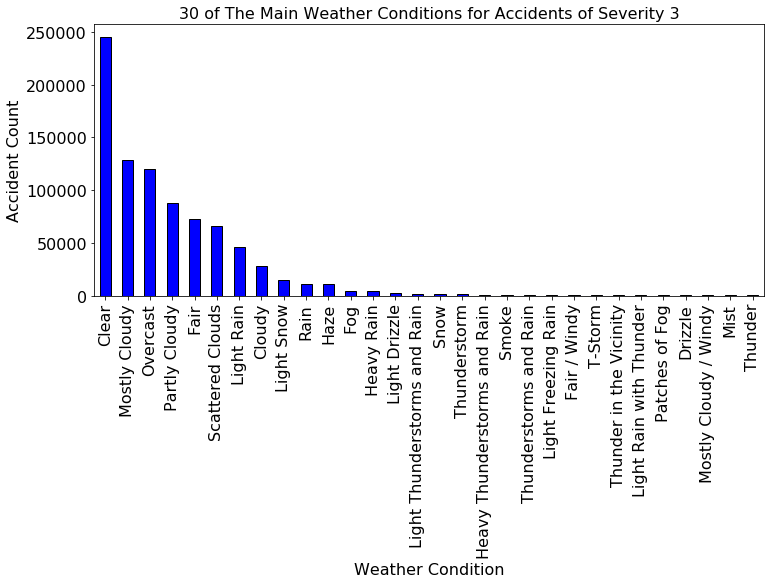

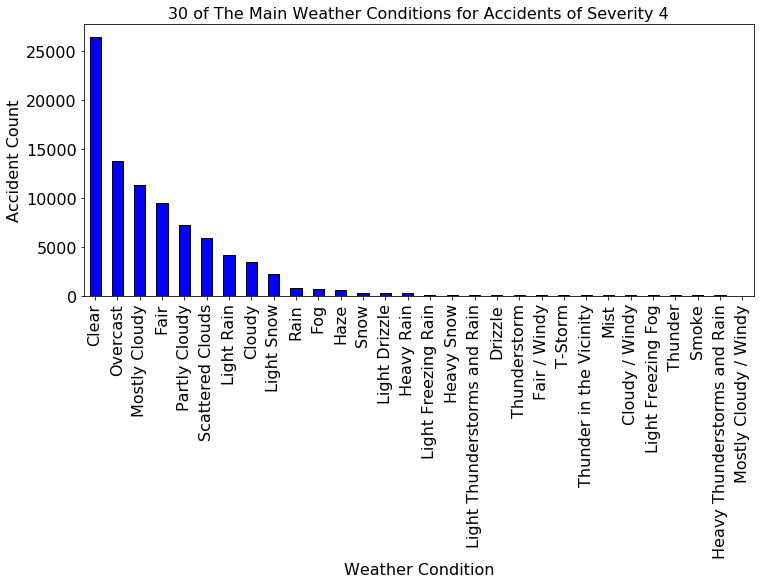

In [21]:
for s in np.arange(1,5):
    plt.subplots(figsize=(12,5))
    new_sv.loc[new_sv["Severity"] == s]['Weather_Condition'].value_counts().sort_values(ascending=False).head(30).plot.bar(width=0.5,color='b',edgecolor='k',align='center',linewidth=1)
    plt.xlabel('Weather Condition',fontsize=16)
    plt.ylabel('Accident Count',fontsize=16)
    plt.title('30 of The Main Weather Conditions for Accidents of Severity ' + str(s),fontsize=16)
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)

In [33]:
sv_main['Start_Time'] = pd.to_datetime(sv_main['Start_Time'], infer_datetime_format=True)
sv_main['Day_of_Week'] = sv_main['Start_Time'].dt.day_name()

In [34]:
sv_main[[ 'Start_Time', 'Day_of_Week']].head()

,Start_Time,Day_of_Week
0,2016-02-08 05:46:00,Monday
1,2016-02-08 06:07:59,Monday
2,2016-02-08 06:49:27,Monday
3,2016-02-08 07:23:34,Monday
4,2016-02-08 07:39:07,Monday


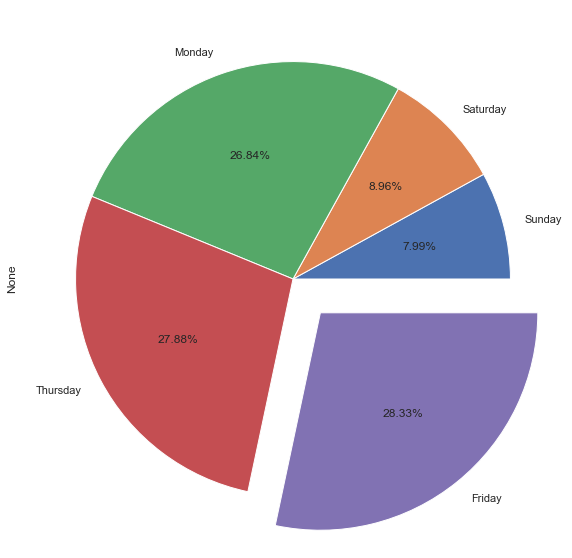

In [67]:
plt.figure(figsize=(16,10))
sv_main.groupby('Day_of_Week') \
        .size() \
        .sort_values(ascending = True) \
        .iloc[:5] \
        .plot.pie(explode=[0,0,0,0,0.2],autopct='%1.2f%%')
plt.ioff()

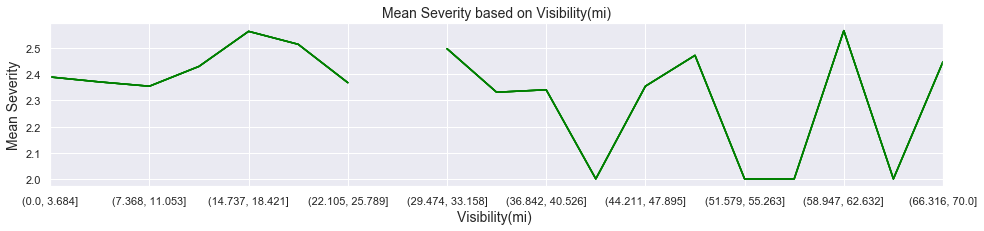

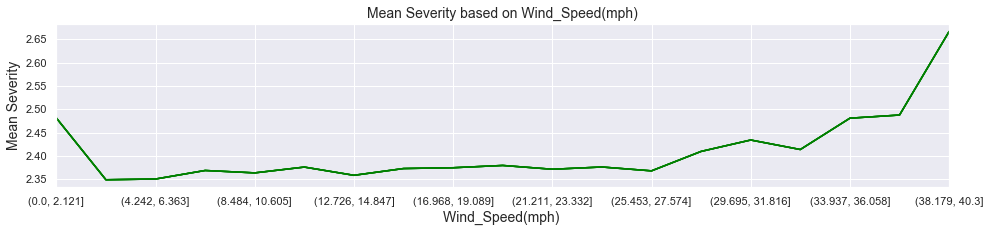

In [63]:

weather_factor = [ 'Visibility(mi)', 'Wind_Speed(mph)']

for factor in weather_factor:
   
    mini = sv_main[factor].quantile(q=0.0001)
    maxi = sv_main[factor].quantile(q=0.9999)
    
    plt.subplots(figsize=(16,3))
    for s in np.arange(1,5):
        sv_main["Severity"].groupby(pd.cut(sv_main[factor], np.linspace(mini,maxi,num=20))).mean().plot(color=['green'])
        plt.title("Mean Severity based on " + factor, fontsize=14)
        plt.xlabel(factor + " ", fontsize=14)
        plt.ylabel("Mean Severity", fontsize=14)
        plt.xticks(fontsize=11)
        plt.yticks(fontsize=11)

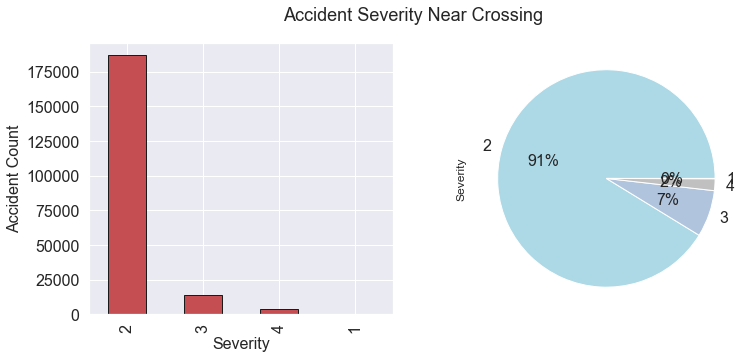

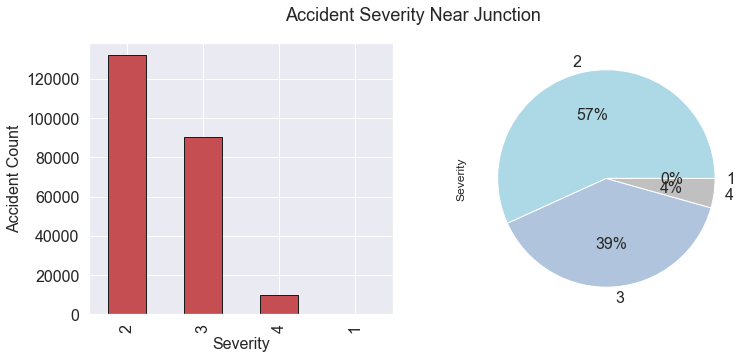

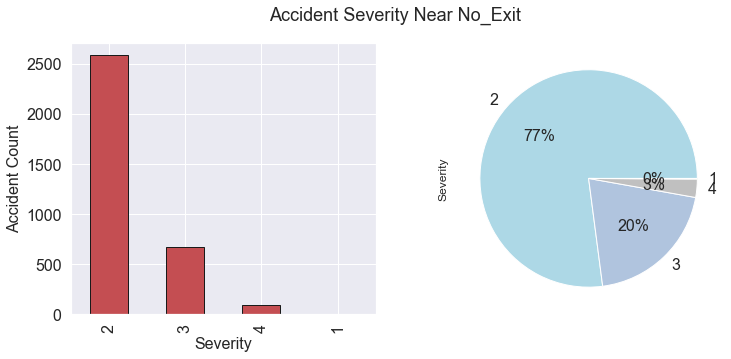

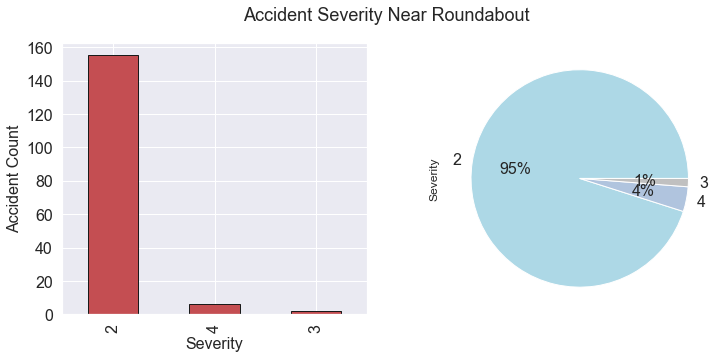

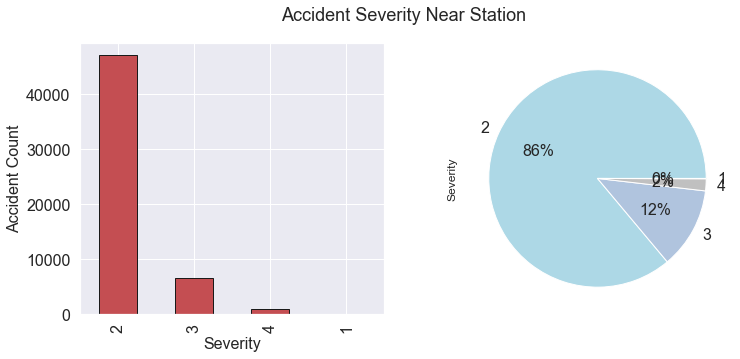

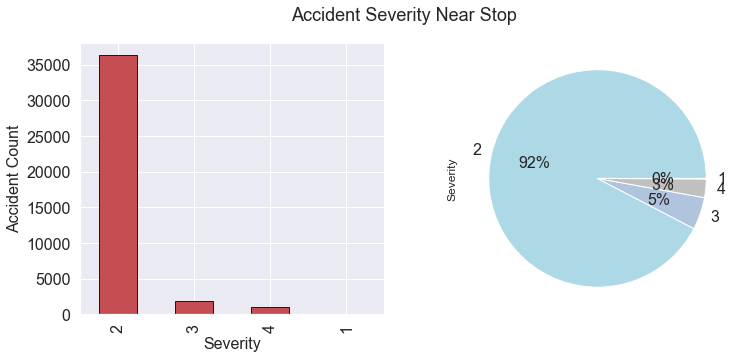

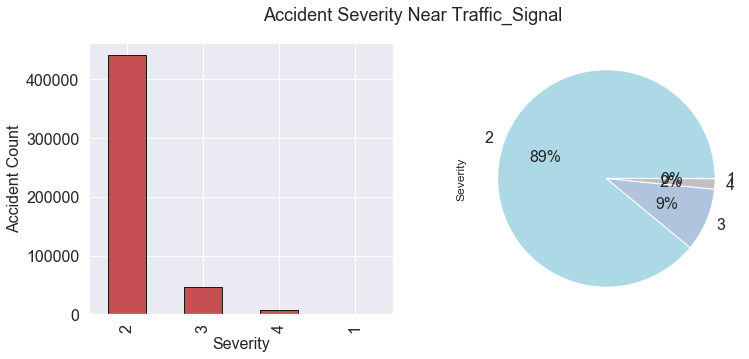

In [94]:
for area in ['Crossing','Junction', 'No_Exit','Roundabout', 'Station', 'Stop', 'Traffic_Signal', 'Turning_Loop']:
    # check if infrastructure type is found in any record 
    if (sv_main[area] == True).sum() > 0:
        my_colors = ['lightblue','lightsteelblue','silver','green']
        plt.subplots(1,2,figsize=(12,5))
        plt.xticks(fontsize=14)
        plt.suptitle('Accident Severity Near ' + area,fontsize=18)
        plt.subplot(1,2,1)
        sv_main.loc[sv_main[area] == True]['Severity'].value_counts().plot.bar(width=0.5,color='r',edgecolor='k',align='center',linewidth=1)
        plt.xlabel('Severity',fontsize=16)
        plt.ylabel('Accident Count',fontsize=16)
        plt.xticks(fontsize=16)
        plt.yticks(fontsize=16)
        plt.subplot(1,2,2)
        sv_main.loc[sv_main[area] == True]['Severity'].value_counts().plot.pie(autopct='%1.0f%%',fontsize=16,colors=my_colors)